<a href="https://colab.research.google.com/github/DurgalakshmiU/durgaa_INFO5731_Spring2021/blob/main/In_class_exercise_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (20 points in total, 3/16/2021)**

Question description: In the last in-class-exercise (exercise-06), you collected the titles of 100 articles about data science, natural language processing, and machine learning. The 100 article titles will be used as the text corpus of this exercise. Perform the following tasks:

## (1) (8 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [8]:
#Gensim,plotting tools,logging
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
!pip install pyLDAvis
!pip install --upgrade gensim
import pyLDAvis
import pyLDAvis.gensim 
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)



Requirement already up-to-date: gensim in /usr/local/lib/python3.7/dist-packages (3.8.3)


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [17]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')               #stopwords
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import pandas as pd
df = pd.read_csv("/content/proje.csv")
df.head(100)

,Unnamed: 0,Title
0,0,Practice your skills in Data Science Projects ...
1,1,Data Science Project on President Heights
2,2,Data Science Project on Birth Rate Analysis
3,3,Data Science Project on Time Series
4,4,Data Science Project on Area and Population
...,...,...
95,95,Image Classification with Artificial Neural Ne...
96,96,Binary Classification Model
97,97,Data Augmentation with Deep Learning
98,98,Next Word Prediction Model.


In [39]:
import re
df['Title']=df['Title'].str.lower()
d = df['Title'].values.tolist() 
d= [re.sub(" $","",se) for se in d]
d = [re.sub('\S*@\S*\s?', '', se) for se in d]
d= [re.sub('\s+', ' ', se) for se in d]
d = [re.sub("\'", "", se) for se in d]
print(d[:100])

['practice your skills in data science projects with python, by learning and then trying all these hands-on, interactive projects, that i have posted for you. by learning and trying these projects on data science you will understand about the practical environment where you follow instructions in the real-time.', 'data science project on president heights', 'data science project on birth rate analysis', 'data science project on time series', 'data science project on area and population', 'next word prediction model', 'image segmentation', 'face landmarks detection', 'openai gym in machine learning', 'machine translation model', 'build the tiktok algorithm with machine learning.', 'analyze ilp matches.', 'predict ipl winner 2020.', 'predict car prices.', 'analyze call records.', 'create an api with python.', 'send custom emails with python.', 'colour recognition with machine learning.', 'create a 3d video animation.', 'image features extraction.', 'rainfall prediction with machine learn

In [41]:
def setowor(sen):
    for sentence in sen:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

d_words = list(setowor(d))
print(d_words[:100])

[['practice', 'your', 'skills', 'in', 'data', 'science', 'projects', 'with', 'python', 'by', 'learning', 'and', 'then', 'trying', 'all', 'these', 'hands', 'on', 'interactive', 'projects', 'that', 'have', 'posted', 'for', 'you', 'by', 'learning', 'and', 'trying', 'these', 'projects', 'on', 'data', 'science', 'you', 'will', 'understand', 'about', 'the', 'practical', 'environment', 'where', 'you', 'follow', 'instructions', 'in', 'the', 'real', 'time'], ['data', 'science', 'project', 'on', 'president', 'heights'], ['data', 'science', 'project', 'on', 'birth', 'rate', 'analysis'], ['data', 'science', 'project', 'on', 'time', 'series'], ['data', 'science', 'project', 'on', 'area', 'and', 'population'], ['next', 'word', 'prediction', 'model'], ['image', 'segmentation'], ['face', 'landmarks', 'detection'], ['openai', 'gym', 'in', 'machine', 'learning'], ['machine', 'translation', 'model'], ['build', 'the', 'tiktok', 'algorithm', 'with', 'machine', 'learning'], ['analyze', 'ilp', 'matches'], ['

In [147]:
#Bigram and Trigram models
bi_gram = gensim.models.Phrases(d_words, min_count=5, threshold=100) # higher threshold fewer phrases.
tri_gram = gensim.models.Phrases(bi_gram[d_words], threshold=100)  
bi_mod = gensim.models.phrases.Phraser(bi_gram)
tri_mod = gensim.models.phrases.Phraser(tri_gram)
print(tri_mod[bi_mod[d_words[1]]])

['data', 'science', 'project', 'on', 'president', 'heights']


In [51]:
# Defining functions for stopwords, Bigrams, Trigrams and Lemmatization
def rem_stopwords(t):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in t]
def makbigrams(t):
    return [bi_mod[doc] for doc in t]
def maktrigrams(t):
    return [tri_mod[bi_mod[doc]] for doc in t]
def lemmat(t, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts = []
    for sent in t:
        doc = nlp(" ".join(sent)) 
        texts.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts
d_wordsnostops = rem_stopwords(d_words)        # Removal of Stop Words and form Bigrams
d_wordsbi_grams = makbigrams(d_wordsnostops)
nlp = spacy.load('en', disable=['parser', 'ner'])
d_lemma = lemmat(d_wordsbi_grams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])        #Lemmatization
print(d_lemma[:1])

[['practice', 'skill', 'datum', 'science', 'project', 'learn', 'try', 'hand', 'interactive', 'project', 'post', 'learn', 'try', 'project', 'datum', 'science', 'understand', 'practical', 'environment', 'follow', 'instruction', 'real', 'time']]


In [55]:
id2word = corpora.Dictionary(d_lemma)           #Dictionary, corpus, tdf and view
t = d_lemma
corpus = [id2word.doc2bow(text) for text in t]
print(corpus[:1])

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 3), (11, 1), (12, 2), (13, 1), (14, 1), (15, 2), (16, 1)]]


In [57]:
res = [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:]]
LDAmodel = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=id2word,num_topics=20,random_state=100,update_every=1,chunksize=100,passes=20,alpha='auto',per_word_topics=True)
pprint(LDAmodel.print_topics())                  # Keyword in 20 topics
docLDA = LDAmodel[corpus]


[(0,
  '0.272*"feature" + 0.258*"extraction" + 0.245*"audio" + 0.028*"binary" + '
  '0.015*"search" + 0.001*"image" + 0.001*"vector" + 0.001*"extract" + '
  '0.001*"heart" + 0.001*"stock"'),
 (1,
  '0.153*"build" + 0.054*"match" + 0.054*"survival" + 0.054*"forecast" + '
  '0.005*"weather" + 0.005*"machine" + 0.005*"learning" + 0.005*"hog" + '
  '0.005*"product" + 0.005*"heart"'),
 (2,
  '0.280*"project" + 0.274*"science" + 0.167*"datum" + 0.027*"analysis" + '
  '0.013*"learn" + 0.013*"text" + 0.013*"try" + 0.013*"time" + '
  '0.007*"understand" + 0.007*"real"'),
 (3,
  '0.108*"recognition" + 0.056*"datum" + 0.038*"activity" + 0.038*"human" + '
  '0.038*"smartphone" + 0.038*"use" + 0.038*"deep" + 0.038*"augmentation" + '
  '0.038*"support" + 0.038*"vector"'),
 (4,
  '0.162*"segmentation" + 0.083*"network" + 0.083*"artificial" + '
  '0.083*"neural" + 0.044*"customer" + 0.004*"image" + 0.004*"machine" + '
  '0.004*"classification" + 0.004*"learning" + 0.004*"lung"'),
 (5,
  '0.060*"car" +

In [62]:
print('\nPerplexity: ', LDAmodel.log_perplexity(corpus))   #perplexity
coherence_model_lda = CoherenceModel(model=LDAmodel, texts=d_lemma, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)                 #Coherence


Perplexity:  -5.700303902187585

Coherence Score:  0.6132090398744892


In [89]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.193055  0.142573       1        1  33.536034
6      0.296264  0.107644       2        1  22.707374
4      0.231281  0.069626       3        1  11.333036
3     -0.195710  0.181799       4        1  11.089722
5      0.014872 -0.032978       5        1   5.744516
1     -0.027401 -0.053342       6        1   4.060213
9     -0.026501 -0.052464       7        1   3.696528
0     -0.038289 -0.113965       8        1   2.705849
8     -0.025959 -0.047306       9        1   2.594219
7     -0.035502 -0.201587      10        1   2.532508, topic_info=            Term       Freq      Total Category  logprob  loglift
32       machine  25.000000  25.000000  Default  30.0000  30.0000
22         model  17.000000  17.000000  Default  29.0000  29.0000
10       project  18.000000  18.000000  Default  28.0000  28.0000
12       science  18.000000  18.000000  Default  27.0000  27.0000
31      learning  17.000000  17.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
132         data   0.022285   5.704861  Topic10  -6.0387  -1.8692
133         work   0.022285   5.704861  Topic10  -6.0387  -1.8692
1    environment   0.022285   1.247337  Topic10  -6.0387  -0.3489
2         follow   0.022285   1.247337  Topic10  -6.0387  -0.3489
3           hand   0.022285   1.247337  Topic10  -6.0387  -0.3489

[482 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
17        1  0.709872    analysis
17        5  0.236624    analysis
84        1  0.801711  annotation
103       5  0.678296  artificial
128      10  0.738598       audio
...     ...       ...         ...
16        1  0.801708  understand
87        1  0.801723      vector
75        3  0.761998     weather
25        4  0.857661        word
133       4  0.876445        work

[80 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 7, 5, 4, 6, 2, 10, 1, 9, 8])

In [27]:
import os     
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       
install_java()
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

openjdk version "11.0.10" 2021-01-19
OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
--2021-03-18 17:21:15--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  17.4MB/s    in 0.9s    

2021-03-18 17:21:16 (17.4 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/malle

In [71]:
os.environ['MALLET'] = '/content/mallet-2.0.8'
malletpath = '/content/mallet-2.0.8/bin/mallet'
ldamallet = gensim.models.wrappers.LdaMallet(malletpath, corpus=corpus, num_topics=10, id2word=id2word)
pprint(ldamallet.show_topics(formatted=False))
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=d_lemma, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)    #Coherence score

[(0,
  [('project', 0.30303030303030304),
   ('text', 0.12121212121212122),
   ('classification', 0.09090909090909091),
   ('price', 0.09090909090909091),
   ('supermarket', 0.030303030303030304),
   ('movie', 0.030303030303030304),
   ('search', 0.030303030303030304),
   ('word', 0.030303030303030304),
   ('turnover', 0.030303030303030304),
   ('email', 0.030303030303030304)]),
 (1,
  [('datum', 0.34285714285714286),
   ('predict', 0.17142857142857143),
   ('prediction', 0.17142857142857143),
   ('learn', 0.05714285714285714),
   ('book', 0.02857142857142857),
   ('augmentation', 0.02857142857142857),
   ('daily', 0.02857142857142857),
   ('migration', 0.02857142857142857),
   ('stock', 0.02857142857142857),
   ('smartphone', 0.02857142857142857)]),
 (2,
  [('machine', 0.625),
   ('build', 0.075),
   ('birth', 0.025),
   ('bar', 0.025),
   ('heart', 0.025),
   ('trace', 0.025),
   ('processing', 0.025),
   ('application', 0.025),
   ('fraud', 0.025),
   ('deep', 0.025)]),
 (3,
  [('im

In [146]:
def compcoherenceval(dictionary, corpus, texts, start, limit, step):
    
    coherenceval= []
    modelli= []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(malletpath, corpus=corpus, num_topics=num_topics, id2word=id2word)
        modelli.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherenceval.append(coherencemodel.get_coherence())

    return modelli, coherenceval
modelli, coherenceval = compcoherenceval(dictionary=id2word, corpus=corpus, texts=d_lemma, start=2, limit=40, step=6)



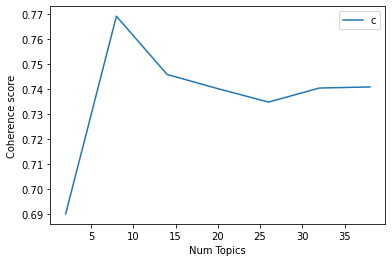

In [94]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(y, coherenceval)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherenceval"), loc='best')
plt.show()                                     #Graph


In [96]:
for l, v in zip(y, coherenceval):
    print("Num of Topics =", l, " has Coherence Value:", round(v, 4))    
    

Num of Topics = 2  has Coherence Value: 0.6899
Num of Topics = 8  has Coherence Value: 0.7692
Num of Topics = 14  has Coherence Value: 0.7459
Num of Topics = 20  has Coherence Value: 0.7402
Num of Topics = 26  has Coherence Value: 0.7348
Num of Topics = 32  has Coherence Value: 0.7404
Num of Topics = 38  has Coherence Value: 0.7409


In [78]:
optimal_model = modelli[5]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))           #selecting model,print topics

[(17,
  '0.571*"project" + 0.286*"model" + 0.143*"network" + 0.000*"heart" + '
  '0.000*"stock" + 0.000*"extract" + 0.000*"hog" + 0.000*"product" + '
  '0.000*"support" + 0.000*"disease"'),
 (1,
  '0.538*"model" + 0.077*"emotion" + 0.077*"smartphone" + 0.077*"processing" + '
  '0.077*"card" + 0.077*"movie" + 0.077*"environment" + 0.000*"digit" + '
  '0.000*"support" + 0.000*"stock"'),
 (12,
  '0.750*"machine" + 0.125*"instruction" + 0.125*"recognition" + '
  '0.000*"disease" + 0.000*"movie" + 0.000*"stock" + 0.000*"extract" + '
  '0.000*"hog" + 0.000*"product" + 0.000*"support"'),
 (7,
  '0.167*"neural" + 0.167*"binary" + 0.167*"search" + 0.167*"learning" + '
  '0.167*"landmark" + 0.167*"language" + 0.000*"heart" + 0.000*"hog" + '
  '0.000*"product" + 0.000*"disease"'),
 (29,
  '0.875*"machine" + 0.062*"email" + 0.062*"prediction" + 0.000*"movie" + '
  '0.000*"extract" + 0.000*"hog" + 0.000*"product" + 0.000*"disease" + '
  '0.000*"vector" + 0.000*"student"'),
 (9,
  '0.188*"detection"

In [151]:
def ftopicssentences(ldamodel=LDAmodel, corpus=corpus, texts=d):
    sent_topics_df = pd.DataFrame()

    
    for i, row in enumerate(ldamodel[corpus]):           #For main topic in each document
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant Topic', 'Perc_Contribution', 'Topic Keywords']

    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = ftopicssentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document Num', 'Dominant Topic', 'Topic Perc_Contribution', 'Keywords', 'Texts']

# Show
df_dominant_topic.head(100)

,Document Num,Dominant Topic,Topic Perc_Contribution,Keywords,Texts
0,0,4.0,0.0627,"practical, follow, news, neural, fake, underst...",practice your skills in data science projects ...
1,1,30.0,0.0442,"science, skill, disease, heart, stock, extract...",data science project on president heights
2,2,11.0,0.0477,"analysis, datum, network, extract, contact, pr...",data science project on birth rate analysis
3,3,8.0,0.0433,"detection, time, tensorflow, heart, video, mig...",data science project on time series
4,4,23.0,0.0426,"learning, learn, email, analysis, whatsapp, pr...",data science project on area and population
...,...,...,...,...,...
95,95,14.0,0.0587,"image, artificial, chat, product, vector, stoc...",image classification with artificial neural ne...
96,96,27.0,0.0483,"classification, science, product, support, vec...",binary classification model
97,97,31.0,0.0619,"datum, deep, book, forecast, weather, send, au...",data augmentation with deep learning
98,98,0.0,0.0442,"prediction, review, algorithmic, face, car, ex...",next word prediction model.


In [153]:

topicssorteddf_mallet = pd.DataFrame()                     #Top 5

topicsoutdf_grpd = df_topic_sents_keywords.groupby('Dominant Topic')

for i, grp in topicsoutdf_grpd:
    topicssorteddf_mallet = pd.concat([topicssorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

   
topicssorteddf_mallet.reset_index(drop=True, inplace=True)

topicssorteddf_mallet.columns = ['Topic No', "Topic Perc_Contrib", "Keywords", "Texts"]    #Format

topicssorteddf_mallet.head()

,Topic No,Topic Perc_Contrib,Keywords,Texts
0,0.0,0.0483,"prediction, review, algorithmic, face, car, ex...",next word prediction model
1,1.0,0.0630,"model, emotion, smartphone, processing, card, ...",emotion detection model
2,2.0,0.0651,"predict, package, forecast, efficiency, heart,...",predict fuel efficiency
3,3.0,0.0587,"project, text, digit, learning, activity, vect...",data science project on text and annotations
4,4.0,0.0627,"practical, follow, news, neural, fake, underst...",practice your skills in data science projects ...


In [156]:

topic_counts = df_topic_sents_keywords['Dominant Topic'].value_counts()    #No:of Doc for each topic

topic_contribution = round(topic_counts/topic_counts.sum(), 4)              #Percent 

topic_num_keywords = df_topic_sents_keywords[['Dominant Topic', 'Topic Keywords']]   #Topic Number and Keywords

df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

df_dominant_topics.columns = ['Dominant Topic', 'Topic Keywords', 'Num of Documents', 'Perc_Documents']

df_dominant_topics

,Dominant Topic,Topic Keywords,Num of Documents,Perc_Documents
0.0,4.0,"practical, follow, news, neural, fake, underst...",12.0,0.1121
1.0,30.0,"science, skill, disease, heart, stock, extract...",6.0,0.0561
2.0,11.0,"analysis, datum, network, extract, contact, pr...",7.0,0.0654
3.0,8.0,"detection, time, tensorflow, heart, video, mig...",4.0,0.0374
4.0,23.0,"learning, learn, email, analysis, whatsapp, pr...",3.0,0.0280
...,...,...,...,...
102.0,22.0,"feature, recognition, model, bitcoin, data, fa...",NaN,NaN
103.0,1.0,"model, emotion, smartphone, processing, card, ...",NaN,NaN
104.0,27.0,"classification, science, product, support, vec...",NaN,NaN
105.0,5.0,"datum, price, science, originally, sequence, b...",NaN,NaN


## (2) (8 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [157]:
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
def load_data(path,file_name):
    doc_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r") as f:
        for line in f.readlines():
            text = line.strip()
            doc_list.append(text)
    print("Total No: of Documents:",len(doc_list))
    titles.append( text[0:min(len(text),100)] )
    return doc_list,titles

In [139]:
def preprocess_data(doc_set):
  
    tokenizer = RegexpTokenizer(r'\w+')
    en_stop = set(stopwords.words('english'))
    p_stemmer = PorterStemmer()
    texts = []
    for i in doc_set:
        raw = i.lower()   #cleaning
        tokens = tokenizer.tokenize(raw)
        stopped_tokens = [i for i in tokens if not i in en_stop]
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        texts.append(stemmed_tokens)   #Preprocessed text
    return texts

In [158]:
def prepare_corpus(clean_doc):
    dictionary = corpora.Dictionary(clean_doc)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_doc]
    return dictionary,doc_term_matrix

In [159]:
def create_gensim_lsa_model(clean_doc,number_of_topics,words):
    dictionary,doc_term_matrix=prepare_corpus(clean_doc)
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel        #LSA model

In [160]:
def compcoherencevalues(dictionary, doc_term_matrix, clean_doc, stop, start=2, step=3):
    coherencevalues = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=clean_doc, dictionary=dictionary, coherence='c_v')
        coherencevalues.append(coherencemodel.get_coherence())
    return model_list, coherencevalues

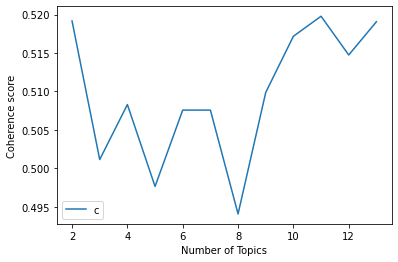

In [173]:
def plot_graph(clean_doc,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(clean_doc)
    model_list, coherencevalues = compcoherencevalues(dictionary, doc_term_matrix,clean_doc,
                                                            stop, start, step)
    x = range(start, stop, step)
    plt.plot(x, coherencevalues)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence values"), loc='best')
    plt.show()                                   #Graph
start,stop,step=2,14,1
plot_graph(clean_text,start,stop,step)

## (3) (4 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

In [ ]:
# Write your answer here (no code needed for this question)
'''
As we know LDA is used to classify text in a document to a particular topic. It 
builds a topic per document model and words per topic model, modeled as 
Dirichlet distributions.LSA is a computational text analysis tool that builds a 
semantic space from a corpus of text.In this where LDA focus on solving topic
modelling problems whereas LSA focus on reducing matrix dimension.
On comparing two LDA is more accurate than LSA because as we observed LSA is 
very slow for large corpora it also doesn't offer the map reduce like LDA.
And also coherence score for LDA is approximately 0.75 whereas LSA has coherence
score of approximtely 0.52.These are some of the reasons why LDA is better than
LSA.
'''